In [697]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter

 # Đọc dữ liệu

In [698]:
data = pd.read_csv(r"D:\Machine_build_from\data\spam_ham.csv", encoding='latin-1')
data.head()

,label,text
0,Ham,at http samba sernet de ma bzr samba escapenum...
1,Ham,following please find daily enrononline execut...
2,Ham,you have received this email because the reque...
3,Ham,i need phone numbers for customers invited to ...
4,Spam,hi i am tired this afternoon i am escapenumber...


# thống kê mô tả

In [699]:
print(data.shape)

(4070, 2)


In [700]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4070 non-null   object
 1   text    4070 non-null   object
dtypes: object(2)
memory usage: 63.7+ KB


In [701]:
data.head() 

,label,text
0,Ham,at http samba sernet de ma bzr samba escapenum...
1,Ham,following please find daily enrononline execut...
2,Ham,you have received this email because the reque...
3,Ham,i need phone numbers for customers invited to ...
4,Spam,hi i am tired this afternoon i am escapenumber...


In [702]:
data.isnull().sum()

label    0
text     0
dtype: int64

# Phân tích đặc trưng

label
Ham     2179
Spam    1891
Name: count, dtype: int64


C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\339191346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set3')


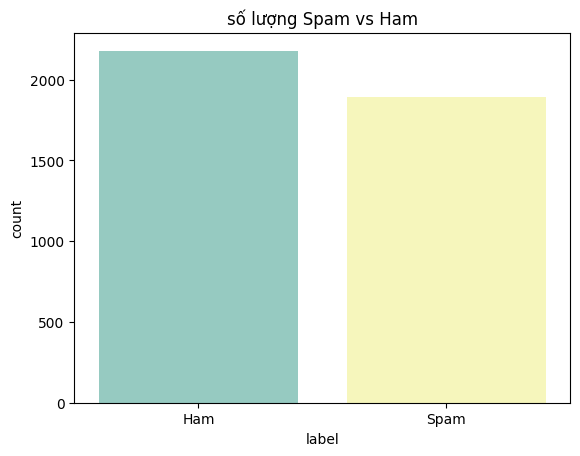

In [703]:
# thống kê nhãn + trực quan
print(data['label'].value_counts(normalize=False))

sns.countplot(x='label', data=data, palette='Set3')
plt.title("số lượng Spam vs Ham")
plt.show()

In [704]:
# tạo cột độ dài
data['do_dai_text'] = data['text'].apply(len)

In [705]:
# mô tả text
data.describe()

,do_dai_text
count,4070.000000
mean,1950.377641
std,4755.943442
min,4.000000
25%,373.250000
50%,859.000000
75%,1932.000000
max,121208.000000


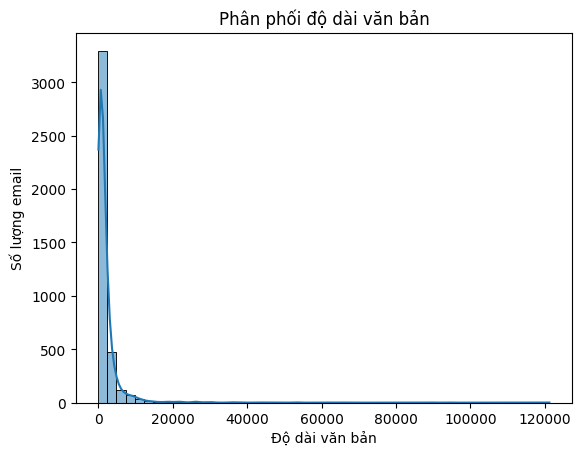

In [706]:
# xem độ dài
sns.histplot(data['do_dai_text'], bins=50, kde=True)
plt.title("Phân phối độ dài văn bản")
plt.xlabel("Độ dài văn bản")
plt.ylabel("Số lượng email")
plt.show()

In [707]:
# Danh sách từ khóa spam
spam_keywords = ['free', 'click', 'offer', 'win', 'money', 'oder']

# Danh sách ký tự đặc biệt 
special_chars = list("!@#$%^&*()-_=+[]{}|;:'\",.<>?/")

# xây dựng đặc trưng
data['do_dai_text'] = data['text'].apply(len)  # số ký tự
data['so_tu'] = data['text'].apply(lambda x: len(x.split()))  # số từ
data['so_tu_in_hoa'] = data['text'].apply(lambda x: sum(1 for w in x.split() if w.isupper()))
data['so_dau_cham_than'] = data['text'].apply(lambda x: x.count('!'))
data['so_link'] = data['text'].apply(lambda x: sum(1 for w in x.split() if 'http' in w or 'www' in w))
data['so_tu_dac_biet'] = data['text'].apply(lambda x: sum(1 for w in x.lower().split() if w in spam_keywords))
data['so_ky_tu_dac_biet'] = data['text'].apply(lambda x: sum(1 for c in x if c in special_chars))
# Tạo cột so_chu_so: đếm tất cả ký tự là số
data['so_chu_so'] = data['text'].apply(lambda x: sum(1 for c in x if c.isdigit()))

# Tỷ lệ chữ in hoa / tổng số ký tự
data['ty_le_chu_in_hoa'] = data['so_tu_in_hoa'] / (data['do_dai_text'] + 1e-5)

# Tỷ lệ ký tự đặc biệt / tổng số ký tự
data['ty_le_ky_tu_dac_biet'] = data['so_ky_tu_dac_biet'] / (data['do_dai_text'] + 1e-5)

C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\2983915671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data, palette='Set2')
C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\2983915671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data, palette='Set2')
C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\2983915671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data, palette='Set2')
C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\2983915671.py:9: Future

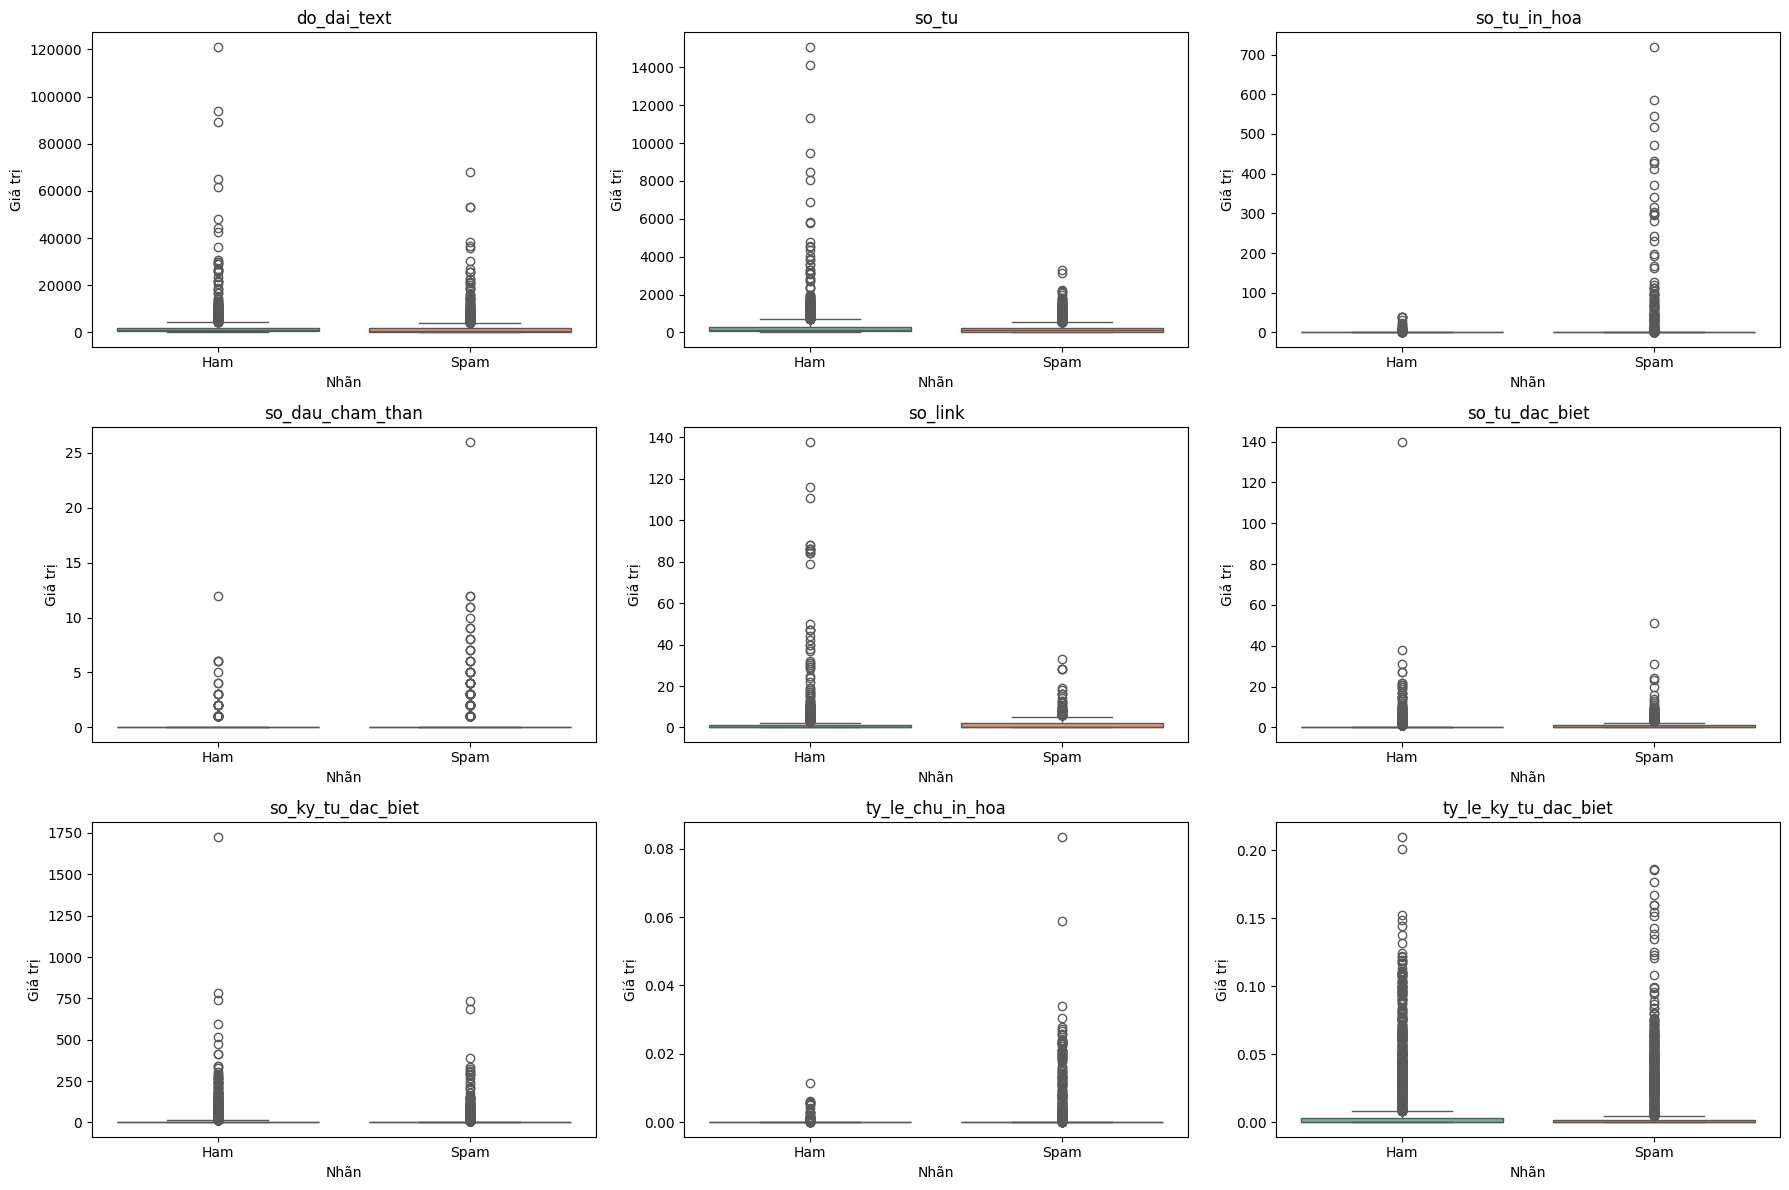

In [708]:
features = ['do_dai_text', 'so_tu', 'so_tu_in_hoa', 'so_dau_cham_than',
            'so_link', 'so_tu_dac_biet', 'so_ky_tu_dac_biet',
            'ty_le_chu_in_hoa', 'ty_le_ky_tu_dac_biet',]

plt.figure(figsize=(18,12))

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='label', y=col, data=data, palette='Set2')
    plt.title(col)
    plt.xlabel('Nhãn')
    plt.ylabel('Giá trị')

plt.tight_layout()
plt.show()

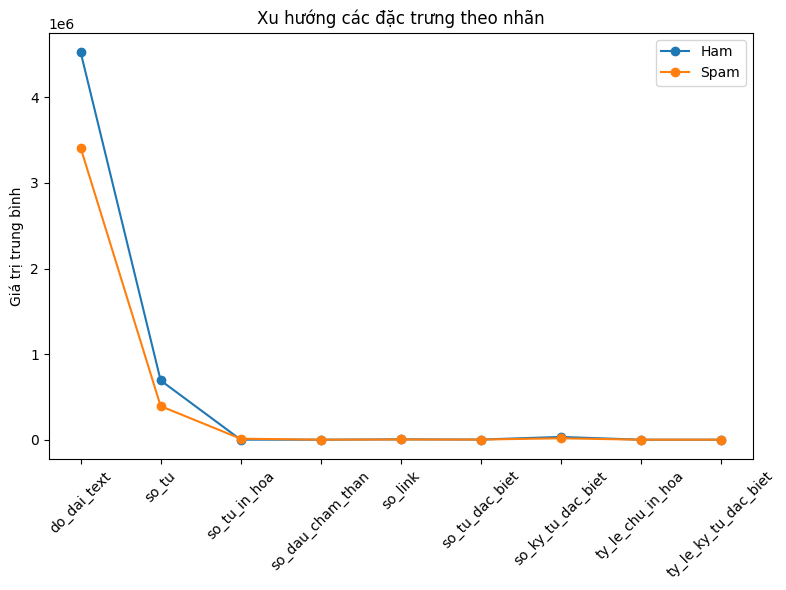

In [709]:
mean_vals = data.groupby('label')[features].sum().reset_index()

# Vẽ line plot xu hướng
plt.figure(figsize=(8,6))
for label in mean_vals['label']:
    plt.plot(features, mean_vals[mean_vals['label']==label].iloc[0,1:], marker='o', label=label)

plt.xticks(rotation=45)
plt.ylabel('Giá trị trung bình')
plt.title('Xu hướng các đặc trưng theo nhãn')
plt.legend()
plt.tight_layout()
plt.show()

các từ spam


In [710]:
spam_keywords = [
    "!!!","!!","$$$","$","$$" "100% free", "all capitals", "all natural", "as seen on", "attention",
    "bad credit", "bargain", "best price", "billion", "certified", "cost", "dear friend",
    "decision", "discount", "double your income", "extra punctuation", "eliminate debt",
    "extra income", "fast cash", "fees", "financial freedom", "free", "guarantee",
    "hot", "increase", "join millions", "lose weight", "lowest price", "make money fast",
    "marketing", "million dollars", "money", "money making", "no medical exams",
    "no purchase necessary", "online pharmacy", "opportunity", "partners",
    "performance", "rates", "satisfaction guaranteed", "search engine listings",
    "selling", "success", "trial", "visit our website",
    "#1", "4U", "50% off", "accept credit cards", "additional income", "affordable",
    "all new", "apply now", "apply online", "be your own boss", "buy direct", "call free",
    "cancel at anytime", "cash bonus", "cheap", "click here", "congratulations",
    "direct email", "direct marketing", "don’t hesitate!", "drastically reduced",
    "earn $", "full refund", "get it now", "gift certificate", "great offer",
    "home based", "incredible deal", "information you requested", "insurance",
    "investment", "limited time offer", "message contains", "no age restrictions",
    "no experience", "no gimmicks", "no hidden costs", "no questions asked", "offer",
    "online degree", "online marketing", "order now", "passwords", "please read",
    "risk free", "save $", "serious cash", "special promotion", "urgent", "web traffic"
]

data["so_tu_spam_list"] = data["text"].apply(
    lambda x: sum(1 for w in spam_keywords if w.lower() in x.lower())
)


C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\1845428298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="so_tu_spam_list", data=data, palette="Set2")


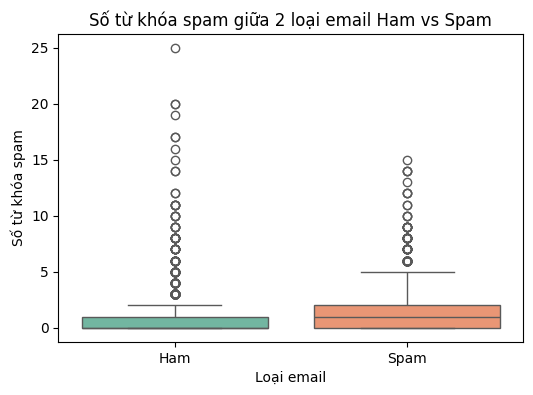

In [711]:
data["label_num"] = data["label"].map({"Ham": 0, "Spam": 1})
plt.figure(figsize=(6,4))
sns.boxplot(x="label", y="so_tu_spam_list", data=data, palette="Set2")
plt.title("Số từ khóa spam giữa 2 loại email Ham vs Spam")
plt.xlabel("Loại email")
plt.ylabel("Số từ khóa spam")
plt.show()

C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\891017305.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="keyword", x="count", data=spam_df, palette="Reds_r")


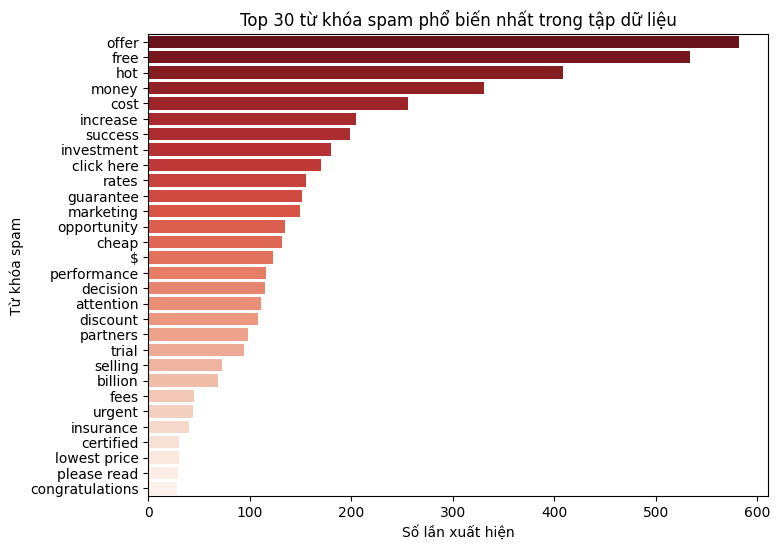

In [712]:

spam_word_counts = Counter()

for text in data["text"]:
    text_lower = text.lower()
    for w in spam_keywords:
        if w.lower() in text_lower:
            spam_word_counts[w.lower()] += 1

spam_df = pd.DataFrame(spam_word_counts.items(), columns=["keyword", "count"])
spam_df = spam_df.sort_values("count", ascending=False).head(30)

plt.figure(figsize=(8,6))
sns.barplot(y="keyword", x="count", data=spam_df, palette="Reds_r")
plt.title("Top 30 từ khóa spam phổ biến nhất trong tập dữ liệu")
plt.xlabel("Số lần xuất hiện")
plt.ylabel("Từ khóa spam")
plt.show()


C:\Users\luan0\AppData\Local\Temp\ipykernel_16500\3975265692.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='count', data=freq_df, palette='Blues_r')


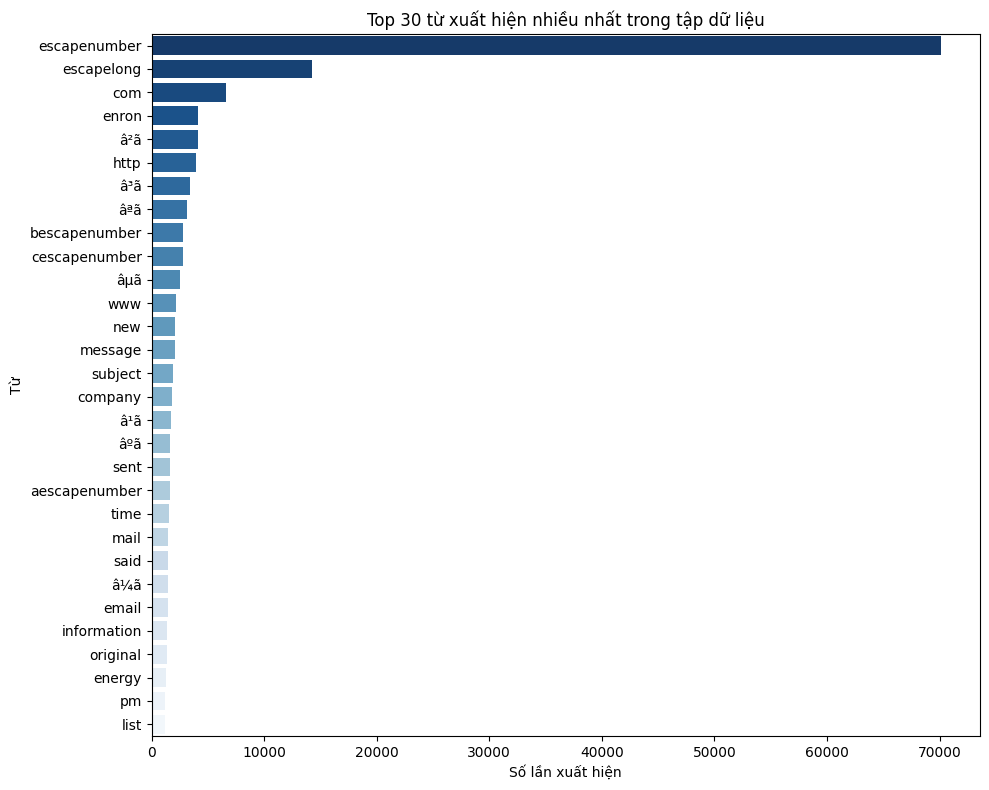

In [713]:

vectorizer = CountVectorizer(stop_words='english', max_features=9000)
X = vectorizer.fit_transform(data['text'])

# Tổng tần suất xuất hiện mỗi từ
word_freq = X.toarray().sum(axis=0)
freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_freq})
freq_df = freq_df.sort_values('count', ascending=False).head(30)

# Vẽ biểu đồ
plt.figure(figsize=(10,8))
sns.barplot(y='word', x='count', data=freq_df, palette='Blues_r')
plt.title('Top 30 từ xuất hiện nhiều nhất trong tập dữ liệu')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Từ')
plt.tight_layout()
plt.show()

In [714]:

features = ['do_dai_text', 'so_tu', 'so_tu_in_hoa', 'so_dau_cham_than',
            'so_link', 'so_tu_dac_biet', 'so_ky_tu_dac_biet',
            'ty_le_chu_in_hoa', 'ty_le_ky_tu_dac_biet','so_chu_so','so_tu_spam_list']

data_numeric = data[features].copy()
# Ma trận tương quan
corr = data_numeric.corr()

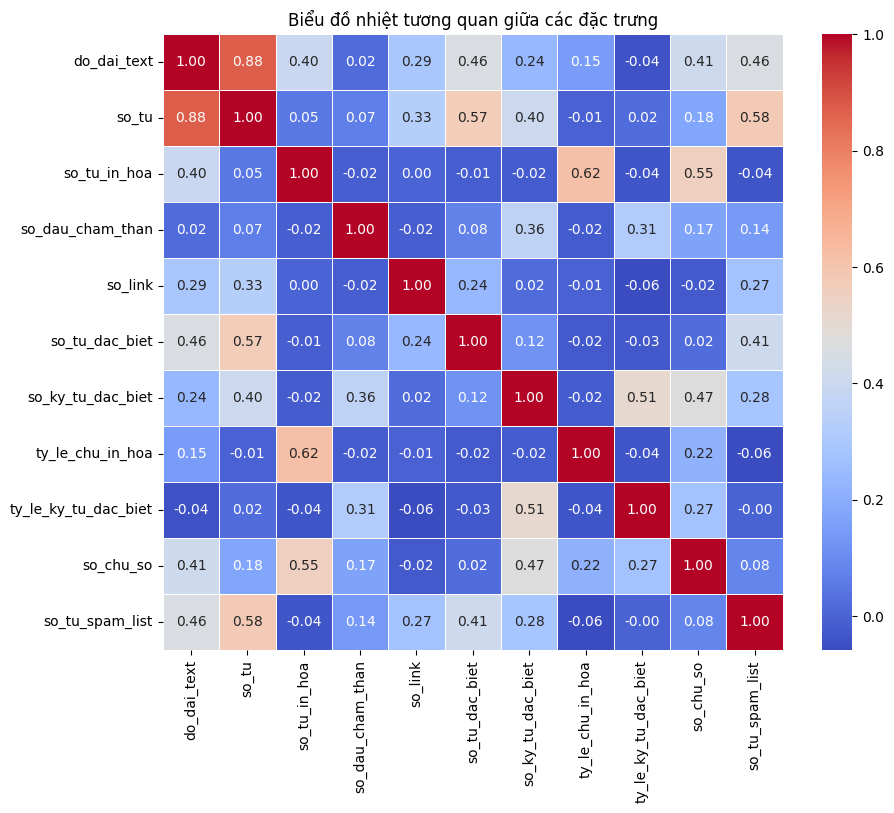

In [715]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Biểu đồ nhiệt tương quan giữa các đặc trưng")
plt.show()